## General

### Librerias

In [19]:
#Si se ejecuta desde colab
!pip install -q regressors

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [17]:
# Importar bibliotecas necesarias
import pandas as pd  # Importa la biblioteca Pandas para manejar datos en un DataFrame.
import seaborn as sns  # Importa Seaborn para visualización de datos.
import matplotlib.pyplot as plt  # Importa Matplotlib para crear gráficos.
import numpy as np  # Importa NumPy para operaciones numéricas.
from sklearn.preprocessing import StandardScaler  # Importa StandardScaler para escalar características.
from sklearn.linear_model import LinearRegression  # Importa LinearRegression para crear un modelo de regresión lineal.
from sklearn.model_selection import train_test_split  # Importa train_test_split para dividir los datos en conjuntos de entrenamiento y prueba.
import sklearn.metrics as metrics  # Importa métricas de evaluación del modelo desde Scikit-Learn.
from regressors import stats  # Importa la biblioteca "regressors" para resumir el modelo de regresión.

### Carga de CSV

In [22]:
# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv('insurance.csv')  # Lee los datos del archivo CSV "insurance.csv" y almacena en un DataFrame llamado "df".

# Filtrar registros con cargos menores a $50,000
df = df[df.charges < 50000]  # Filtra el DataFrame para eliminar registros donde los cargos son mayores a $50,000.

### Breve data viz

(1331, 7)


<Axes: >

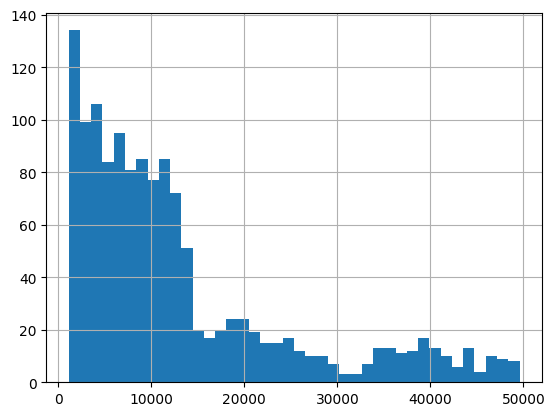

In [23]:
# Imprimir la forma del DataFrame y crear un histograma de cargos
print(df.shape)  # Imprime el número de filas y columnas en el DataFrame.
df['charges'].hist(bins=40)  # Crea un histograma de la columna 'charges' con 40 bins.

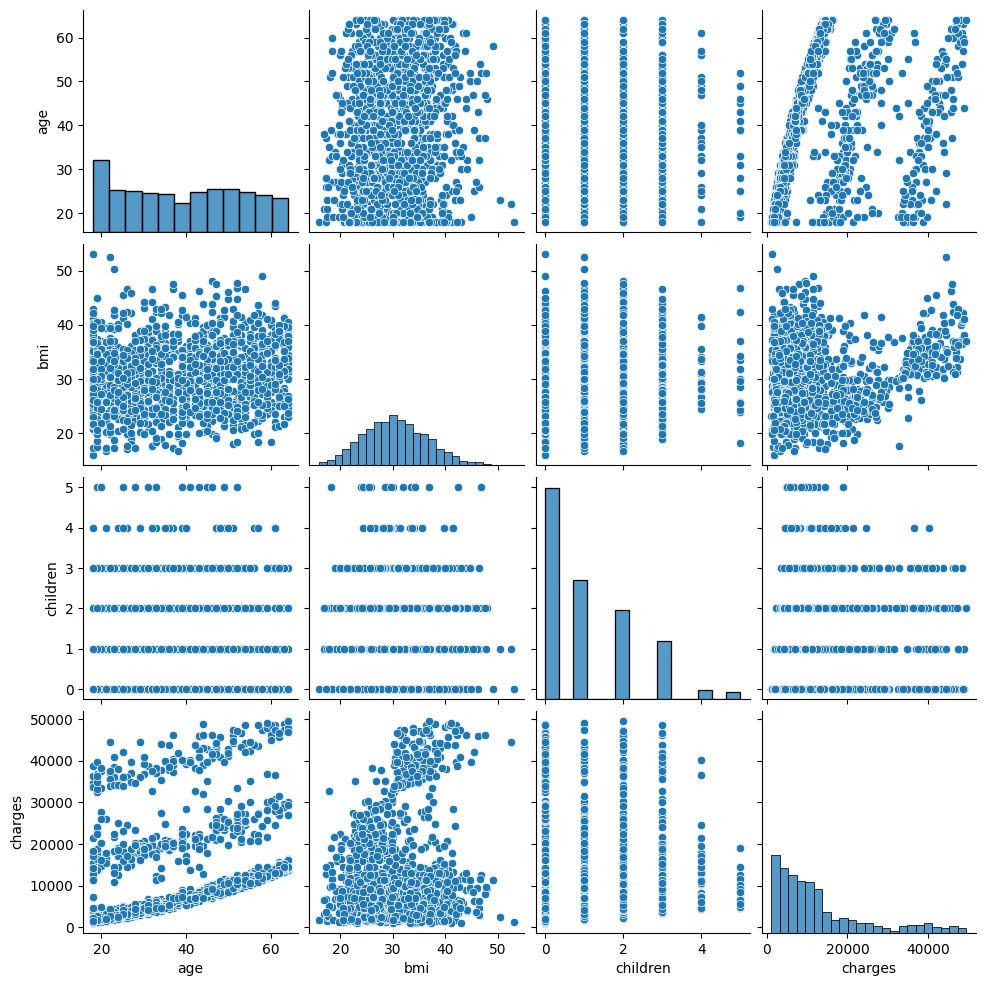

In [24]:
# Crear un pairplot para visualizar relaciones entre variables numéricas
sns.pairplot(df, height=2.5)  # Crea un pairplot para explorar relaciones entre variables numéricas y establece el tamaño de las figuras a 2.5.
plt.show()  # Muestra el gráfico.

<Axes: >

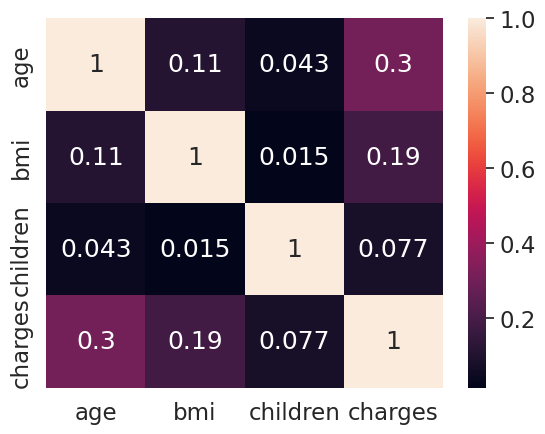

In [25]:
# Calcular la matriz de correlación y mostrar un mapa de calor
numeric_cols = ['age', 'bmi', 'children', 'charges']  # Define las columnas numéricas de interés.
cm = np.corrcoef(df[numeric_cols].values.T)  # Calcula la matriz de correlación entre estas columnas.
sns.set(font_scale=1.5)  # Establece el tamaño de fuente en el mapa de calor.
sns.heatmap(cm, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)  # Crea un mapa de calor de la matriz de correlación con etiquetas.

## Codificacion

In [26]:
# Codificar variables categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
# Utiliza one-hot encoding para convertir variables categóricas (como género, si fuma y región) en columnas numéricas binarias.

## Seleccion de variables del modelo

In [27]:
# Preparar los datos para el modelo de regresión lineal
X_cols = list(set(df.columns) - set(['charges']))  # Obtiene una lista de columnas predictoras eliminando la columna 'charges'.
y_col = ['charges']  # Define la columna de variable objetivo.
X = df[X_cols].values  # Obtiene los valores de las columnas predictoras.
y = df[y_col].values  # Obtiene los valores de la variable objetivo.

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y)
# Divide los datos en un conjunto de entrenamiento y un conjunto de prueba.



## Escalamiento del modelo

In [28]:
# Escalar las características y la variable objetivo
sc_x = StandardScaler().fit(X)  # Escala las características de entrenamiento.
sc_y = StandardScaler().fit(y)  # Escala la variable objetivo.
X_train = sc_x.transform(X_train)  # Aplica la transformación a las características de entrenamiento.
X_test = sc_x.transform(X_test)  # Aplica la transformación a las características de prueba.
y_train = sc_y.transform(y_train)  # Aplica la transformación a la variable objetivo de entrenamiento.
y_test = sc_y.transform(y_test)  # Aplica la transformación a la variable objetivo de prueba.

## Ajuste y entrenamiento del modelo

In [29]:
# Crear un modelo de regresión lineal
model = LinearRegression()  # Crea un objeto de modelo de regresión lineal.

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)  # Ajusta el modelo a los datos de entrenamiento.

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)  # Realiza predicciones en el conjunto de prueba.

# Calcular métricas de evaluación del modelo: Error Cuadrático Medio (MSE) y Coeficiente de Determinación (R^2)
mse = metrics.mean_squared_error(y_test, y_pred)  # Calcula el Error Cuadrático Medio (MSE).
r2 = metrics.r2_score(y_test, y_pred)  # Calcula el Coeficiente de Determinación (R^2).

print("R^2 (Coeficiente de Determinación):", r2.round(4))  # Imprime el valor de R^2 redondeado a 4 decimales.
print("MSE (Error Cuadrático Medio):", mse.round(4))  # Imprime el valor de MSE redondeado a 4 decimales.

R^2 (Coeficiente de Determinación): 0.7378
MSE (Error Cuadrático Medio): 0.285


## Metricas y resultados del modelo

In [30]:
# Ajustar el formato de los coeficientes del modelo y los valores de prueba para el resumen
model.intercept_ = model.intercept_[0]  # Ajusta el formato del término independiente del modelo.
model.coef_ = model.coef_.reshape(-1)  # Ajusta el formato de los coeficientes del modelo.
y_test = y_test.reshape(-1)  # Ajusta el formato de los valores de prueba de la variable objetivo.

# Mostrar un resumen del modelo de regresión
print("========== Resumen del Modelo ==========")
stats.summary(model, X_test, y_test, X_cols)  # Muestra un resumen detallado del modelo de regresión.

========== Resumen del Modelo ==========


NameError: ignored

### Visualizacion de resultados del modelo

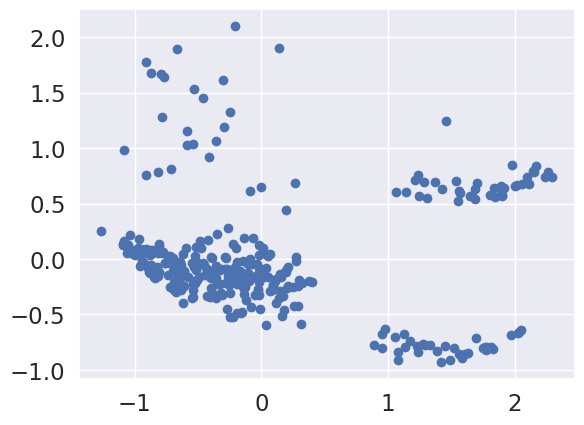

In [31]:
# Visualizar los residuos del modelo de regresión
residuals = y_test - y_pred.reshape(-1)  # Calcula los residuos.
plt.scatter(y_pred, residuals)  # Crea un gráfico de dispersión de las predicciones frente a los residuos.
plt.show()  # Muestra el gráfico.